<a href="https://colab.research.google.com/github/vaibhavdebadwar/Data-Science-Project/blob/main/CO2%20Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TOPIC:** Prediction Of CO2 Emmission from Vehicles.

Loading and data pre-prossing of dataset

In [ ]:
# Here data is being loaded
from google.colab import drive
import pandas as pd
df=pd.read_csv('/content/vehicle_emission_dataset.csv')

df.describe()

,Engine Size,Age of Vehicle,Mileage,Speed,Acceleration,Temperature,Humidity,Wind Speed,Air Pressure,CO2 Emissions,NOx Emissions,PM2.5 Emissions,VOC Emissions,SO2 Emissions
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.369630,14.490000,148995.708000,59.448818,2.491924,14.935772,50.144758,10.027946,1000.199354,273.747254,1.043678,0.105300,0.054611,0.055105
std,1.495677,8.584339,87068.385915,34.437175,1.446130,14.432900,28.787763,5.735533,28.789590,130.789943,0.548226,0.054933,0.025971,0.026076
min,0.800061,0.000000,56.000000,0.000664,0.000084,-9.995320,0.000843,0.003425,950.013001,50.045412,0.100056,0.010005,0.010005,0.010005
25%,2.080910,7.000000,73589.750000,29.502708,1.245908,2.331247,25.731917,5.060126,975.096398,158.448360,0.565941,0.057322,0.031919,0.032710
50%,3.361149,15.000000,148914.500000,59.701114,2.482625,15.013688,49.947395,10.052823,1000.787886,274.734257,1.047428,0.105113,0.054669,0.054948
75%,4.648033,22.000000,224359.500000,88.499982,3.747481,27.423980,75.273523,15.044782,1025.092893,387.958329,1.513206,0.153704,0.076847,0.077687
max,5.998532,29.000000,299863.000000,119.974725,4.999861,39.997848,99.993970,19.997502,1049.986720,499.996419,1.999954,0.199957,0.099993,0.099980


In [ ]:
# From here the data pre-prossing begins
df.columns

Index(['Vehicle Type', 'Fuel Type', 'Engine Size', 'Age of Vehicle', 'Mileage',
       'Speed', 'Acceleration', 'Road Type', 'Traffic Conditions',
       'Temperature', 'Humidity', 'Wind Speed', 'Air Pressure',
       'CO2 Emissions', 'NOx Emissions', 'PM2.5 Emissions', 'VOC Emissions',
       'SO2 Emissions', 'Emission Level'],
      dtype='object')

In [ ]:
df.sample(100)

,Vehicle Type,Fuel Type,Engine Size,Age of Vehicle,Mileage,Speed,Acceleration,Road Type,Traffic Conditions,Temperature,Humidity,Wind Speed,Air Pressure,CO2 Emissions,NOx Emissions,PM2.5 Emissions,VOC Emissions,SO2 Emissions,Emission Level
8085,Truck,Electric,4.235782,15,280472,47.991704,3.399786,City,Free flow,10.550288,65.903178,9.230871,1025.512724,194.947187,0.620394,0.165752,0.073037,0.099240,Medium
6318,Car,Petrol,4.168144,8,182442,29.732464,4.896386,City,Moderate,26.038513,4.142640,11.902314,1011.860098,425.295142,1.383592,0.189590,0.077952,0.095514,High
620,Car,Petrol,1.759509,19,24136,33.294839,1.550069,Rural,Free flow,29.466553,43.480205,11.563318,998.738542,354.758382,1.751646,0.100041,0.082727,0.078072,High
8840,Truck,Hybrid,3.782198,22,198273,44.513769,2.077443,City,Moderate,19.831792,42.231268,4.696860,999.880073,170.987483,0.538430,0.183652,0.035270,0.087564,Medium
8261,Motorcycle,Electric,1.753981,7,187370,73.559158,2.871565,City,Heavy,-7.875650,54.292776,7.369272,1017.707483,55.876394,0.394422,0.054958,0.040439,0.015679,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,Car,Petrol,4.473134,24,103010,54.426916,3.208477,City,Heavy,6.465643,60.882397,2.567893,959.607679,241.567949,1.652220,0.138860,0.032428,0.025485,Medium
820,Motorcycle,Diesel,4.974838,13,186059,70.977586,1.887887,City,Heavy,4.677644,3.336183,13.096698,1009.307714,122.074497,0.992306,0.063356,0.021558,0.065829,Low
9663,Bus,Hybrid,1.004116,13,288142,82.966939,2.380375,Rural,Free flow,-2.247442,24.161537,12.436644,982.719859,92.514010,0.526305,0.178622,0.091198,0.073354,Low
184,Car,Hybrid,2.141296,3,26855,111.953713,2.412670,Highway,Moderate,13.957539,11.685546,5.883343,984.290762,228.265465,1.818749,0.145940,0.048787,0.012932,Medium


In [ ]:
df.shape

(10000, 19)

In [ ]:

df.size

190000

In [ ]:
df.info()
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Vehicle Type        10000 non-null  object 
 1   Fuel Type           10000 non-null  object 
 2   Engine Size         10000 non-null  float64
 3   Age of Vehicle      10000 non-null  int64  
 4   Mileage             10000 non-null  int64  
 5   Speed               10000 non-null  float64
 6   Acceleration        10000 non-null  float64
 7   Road Type           10000 non-null  object 
 8   Traffic Conditions  10000 non-null  object 
 9   Temperature         10000 non-null  float64
 10  Humidity            10000 non-null  float64
 11  Wind Speed          10000 non-null  float64
 12  Air Pressure        10000 non-null  float64
 13  CO2 Emissions       10000 non-null  float64
 14  NOx Emissions       10000 non-null  float64
 15  PM2.5 Emissions     10000 non-null  float64
 16  VOC E

,0
Vehicle Type,object
Fuel Type,object
Engine Size,float64
Age of Vehicle,int64
Mileage,int64
Speed,float64
Acceleration,float64
Road Type,object
Traffic Conditions,object
Temperature,float64


In [ ]:
df.head()

,Vehicle Type,Fuel Type,Engine Size,Age of Vehicle,Mileage,Speed,Acceleration,Road Type,Traffic Conditions,Temperature,Humidity,Wind Speed,Air Pressure,CO2 Emissions,NOx Emissions,PM2.5 Emissions,VOC Emissions,SO2 Emissions,Emission Level
0,Motorcycle,Electric,2.747609,22,291288,49.083255,1.887738,Highway,Moderate,13.880458,52.883905,18.938861,955.411642,179.930088,1.085520,0.011548,0.096207,0.022936,Medium
1,Bus,Electric,5.743714,3,188398,23.460311,3.544147,City,Heavy,19.136947,5.697343,14.716526,1035.763062,250.505219,1.285628,0.187112,0.073321,0.028021,Medium
2,Bus,Hybrid,4.606368,17,281451,115.508350,4.646886,Highway,Free flow,8.123428,3.953116,18.644522,976.207064,404.979103,0.258189,0.132398,0.014744,0.075334,High
3,Truck,Electric,3.913024,4,151321,18.540217,3.581004,Rural,Heavy,35.994893,0.509678,11.951859,966.919462,463.568608,1.040956,0.166325,0.093490,0.025324,High
4,Truck,Hybrid,1.611297,15,91810,109.596566,3.879303,Highway,Moderate,14.793481,52.450884,2.761138,953.229351,79.514604,1.583390,0.078043,0.020396,0.024986,Low


In [ ]:
df.tail()

,Vehicle Type,Fuel Type,Engine Size,Age of Vehicle,Mileage,Speed,Acceleration,Road Type,Traffic Conditions,Temperature,Humidity,Wind Speed,Air Pressure,CO2 Emissions,NOx Emissions,PM2.5 Emissions,VOC Emissions,SO2 Emissions,Emission Level
9995,Motorcycle,Electric,5.259811,1,67323,60.526870,1.665292,Highway,Moderate,0.107381,28.128314,9.221882,1034.277856,380.616106,0.977784,0.162235,0.089424,0.054463,High
9996,Bus,Diesel,5.467046,5,252851,114.120190,1.174369,City,Free flow,37.641697,20.696240,8.927107,958.678711,135.691599,0.338428,0.076185,0.077451,0.099687,Low
9997,Bus,Petrol,5.722881,8,44810,11.987215,0.598791,Highway,Free flow,35.140403,86.267431,15.105582,1020.702178,315.706170,1.265111,0.082554,0.052279,0.088755,High
9998,Bus,Hybrid,2.866938,2,58719,95.832661,1.475712,Rural,Heavy,-6.692706,64.800649,10.002372,1037.489415,210.794670,0.180733,0.062148,0.077239,0.055793,Medium
9999,Car,Petrol,1.929130,15,242020,40.137971,2.292448,Rural,Free flow,16.066580,46.849574,15.712252,992.132708,422.860000,1.962348,0.045526,0.089488,0.062835,High


In [ ]:
# Here data is being cleaned
import pandas as pd
import numpy as np
# Method 1 - Filling every missing value with 0
print("\n Every Missing Value Replaced with 0")
print(df.fillna(0))
# Method 2 - Dropping Rows Having Missing values
print("\n Dropping Rows Having Missing Values")
print(df.dropna())
# Method 3 - Replacing Missing Values with Median
ValueMedian = df['Mileage'].median()
df['Mileage'].fillna(value=ValueMedian, inplace=True)
print("\n Replacing Missing Values of Mileage with Median")
print("\n Median", ValueMedian)
print(df)
# Method 4 - Replacing Missing Values with Mean
ValueMean = df['Air Pressure'].mean()
df['Air Pressure'].fillna(value=ValueMean, inplace=True)
print("\n Replacing Missing Values of Air Pressure with Mean")
print("\n Mean", ValueMean)
print(df)
# Method 5 - Replacing Missing Values with Mode
ValueMode = df['Temperature'].mean()
df['Temperature'].fillna(value=ValueMean, inplace=True)
print("\n Replacing Missing Values of Temperature with Mean")
print("\n Mean", ValueMean)
print(df)


 Every Missing Value Replaced with 0
     Vehicle Type Fuel Type  Engine Size  Age of Vehicle  Mileage       Speed  \
0      Motorcycle  Electric     2.747609              22   291288   49.083255   
1             Bus  Electric     5.743714               3   188398   23.460311   
2             Bus    Hybrid     4.606368              17   281451  115.508350   
3           Truck  Electric     3.913024               4   151321   18.540217   
4           Truck    Hybrid     1.611297              15    91810  109.596566   
...           ...       ...          ...             ...      ...         ...   
9995   Motorcycle  Electric     5.259811               1    67323   60.526870   
9996          Bus    Diesel     5.467046               5   252851  114.120190   
9997          Bus    Petrol     5.722881               8    44810   11.987215   
9998          Bus    Hybrid     2.866938               2    58719   95.832661   
9999          Car    Petrol     1.929130              15   242020   40.

/tmp/ipython-input-2852314948.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-2852314948.py:18: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or

Splitting the dataset into train and test sets into 70% and 30% ratio.

Here data is being transformed from float to integer

In [ ]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
vehicletype_l = le.fit_transform(df['Vehicle Type'])
fueltype_l = le.fit_transform(df['Fuel Type'])
roadtype_l = le.fit_transform(df['Road Type'])
traffic_l = le.fit_transform(df['Traffic Conditions'])
emission_l = le.fit_transform(df['Emission Level'])

# printing label
vehicletype_l
fueltype_l
roadtype_l
traffic_l
emission_l

array([2, 2, 0, ..., 0, 2, 0])

In [ ]:
# Here the changes are being updated
df["Vehicle Type"] = vehicletype_l
df["Fuel Type"] = fueltype_l
df["Road Type"] = roadtype_l
df["Traffic Conditions"] = traffic_l
df["Emission Level"] = emission_l
df


,Vehicle Type,Fuel Type,Engine Size,Age of Vehicle,Mileage,Speed,Acceleration,Road Type,Traffic Conditions,Temperature,Humidity,Wind Speed,Air Pressure,CO2 Emissions,NOx Emissions,PM2.5 Emissions,VOC Emissions,SO2 Emissions,Emission Level
0,2,1,2.747609,22,291288,49.083255,1.887738,1,2,13.880458,52.883905,18.938861,955.411642,179.930088,1.085520,0.011548,0.096207,0.022936,2
1,0,1,5.743714,3,188398,23.460311,3.544147,0,1,19.136947,5.697343,14.716526,1035.763062,250.505219,1.285628,0.187112,0.073321,0.028021,2
2,0,2,4.606368,17,281451,115.508350,4.646886,1,0,8.123428,3.953116,18.644522,976.207064,404.979103,0.258189,0.132398,0.014744,0.075334,0
3,3,1,3.913024,4,151321,18.540217,3.581004,2,1,35.994893,0.509678,11.951859,966.919462,463.568608,1.040956,0.166325,0.093490,0.025324,0
4,3,2,1.611297,15,91810,109.596566,3.879303,1,2,14.793481,52.450884,2.761138,953.229351,79.514604,1.583390,0.078043,0.020396,0.024986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,1,5.259811,1,67323,60.526870,1.665292,1,2,0.107381,28.128314,9.221882,1034.277856,380.616106,0.977784,0.162235,0.089424,0.054463,0
9996,0,0,5.467046,5,252851,114.120190,1.174369,0,0,37.641697,20.696240,8.927107,958.678711,135.691599,0.338428,0.076185,0.077451,0.099687,1
9997,0,3,5.722881,8,44810,11.987215,0.598791,1,0,35.140403,86.267431,15.105582,1020.702178,315.706170,1.265111,0.082554,0.052279,0.088755,0
9998,0,2,2.866938,2,58719,95.832661,1.475712,2,1,-6.692706,64.800649,10.002372,1037.489415,210.794670,0.180733,0.062148,0.077239,0.055793,2


In [ ]:
# After updation the data is being splitted
X = df[['Engine Size', 'Age of Vehicle', 'Mileage',
        'Speed', 'Acceleration', 'Temperature',
        'Humidity', 'Wind Speed', 'Air Pressure', 'CO2 Emissions' , 'NOx Emissions' , 'PM2.5 Emissions' , 'VOC Emissions' , 'SO2 Emissions']]
y = df['Emission Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Support Vector Classifer (SVC)

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
p = model.predict(X_test)
p

array([0, 0, 0, ..., 0, 0, 0])

Accuracy is: 0.45166666666666666
Precision is: 0.15055555555555555
Recall is: 0.3333333333333333
F1-score is: 0.20742441637964026


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



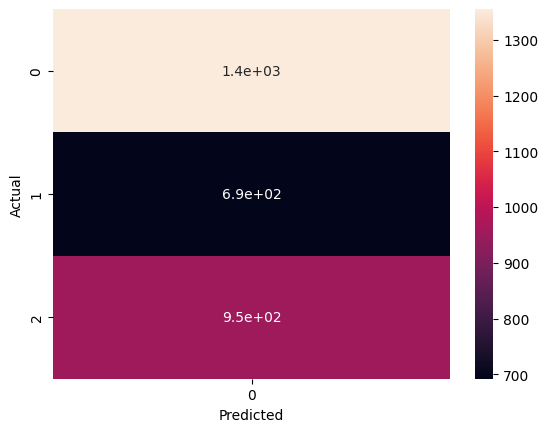

In [ ]:
#SVM Confusion Matrix
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix=pd.crosstab(y_test, p, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy is:', metrics.accuracy_score(y_test, p))
print('Precision is:', metrics.precision_score(y_test, p, average='macro'))
print('Recall is:', metrics.recall_score(y_test, p, average='macro'))
print('F1-score is:', metrics.f1_score(y_test, p, average='macro'))

ROC Curve for SVC

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import plotly.graph_objects as go

# Binarize the output
y_bin = label_binarize(y_test, classes=y.unique())
y_pred_bin = label_binarize(p, classes=y.unique())

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(y.unique())):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_pred_bin[:, i])

# Plot ROC curve
fig = go.Figure()

for i in range(len(y.unique())):
    fig.add_trace(go.Scatter(
        x=fpr[i],
        y=tpr[i],
        mode='lines',
        name=f'ROC curve of class {y.unique()[i]} (area = {roc_auc[i]:.2f})'
    ))

fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    showlegend=True
)

fig.show()

Logistic Regression

In [ ]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)
p1=model1.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy is: 0.971
Precision is: 0.9717510479739032
Recall is: 0.969393653004032
F1-score is: 0.9705430623797972


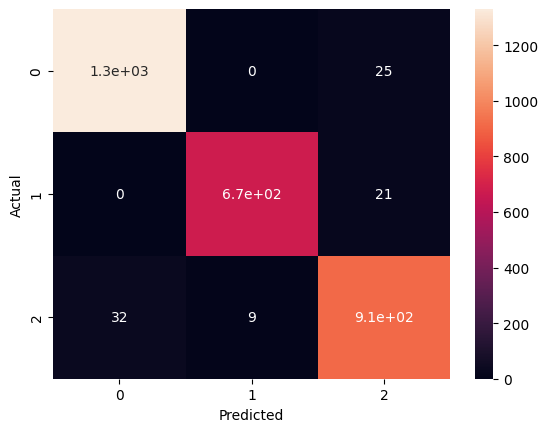

In [ ]:
#Logistic Regression Confusion Matrix
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix=pd.crosstab(y_test, p1, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy is:', metrics.accuracy_score(y_test, p1))
print('Precision is:', metrics.precision_score(y_test, p1, average='macro'))
print('Recall is:', metrics.recall_score(y_test, p1, average='macro'))
print('F1-score is:', metrics.f1_score(y_test, p1, average='macro'))

ROC of Logistic Regression

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import plotly.graph_objects as go

# Binarize the output
y_bin = label_binarize(y_test, classes=y.unique())
y_pred_bin = label_binarize(p1, classes=y.unique())

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(y.unique())):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_pred_bin[:, i])

# Plot ROC curve
fig = go.Figure()

for i in range(len(y.unique())):
    fig.add_trace(go.Scatter(
        x=fpr[i],
        y=tpr[i],
        mode='lines',
        name=f'ROC curve of class {y.unique()[i]} (area = {roc_auc[i]:.2f})'
    ))

fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    showlegend=True
)

fig.show()

Random Forest Classifer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=20)
rfmodel.fit(X_train, y_train)
rfmodel.score(X_test, y_test)
p2=rfmodel.predict(X_test)
p2

array([2, 2, 0, ..., 2, 0, 2])

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1-score is: 1.0


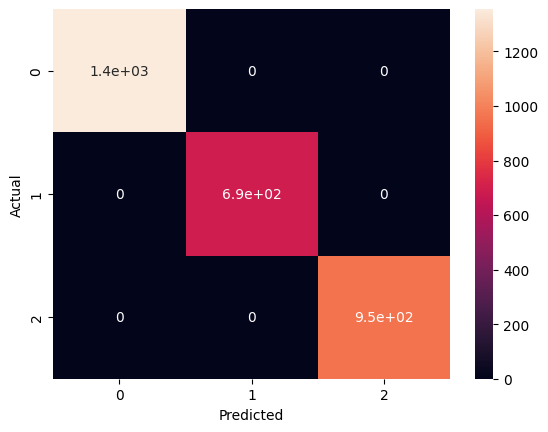

In [ ]:
#Random Forest Confusion Matrix
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix=pd.crosstab(y_test, p2, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy is:', metrics.accuracy_score(y_test, p2))
print('Precision is:', metrics.precision_score(y_test, p2, average='macro'))
print('Recall is:', metrics.recall_score(y_test, p2, average='macro'))
print('F1-score is:', metrics.f1_score(y_test, p2, average='macro'))

ROC courve of Random Forest

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import plotly.graph_objects as go

# Binarize the output
y_bin = label_binarize(y_test, classes=y.unique())
y_pred_bin = label_binarize(p2, classes=y.unique())

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(y.unique())):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_pred_bin[:, i])

# Plot ROC curve
fig = go.Figure()

for i in range(len(y.unique())):
    fig.add_trace(go.Scatter(
        x=fpr[i],
        y=tpr[i],
        mode='lines',
        name=f'ROC curve of class {y.unique()[i]} (area = {roc_auc[i]:.2f})'
    ))

fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    showlegend=True
)

fig.show()

Decision Tree Classifer

In [ ]:
from sklearn import tree
dtmodel = tree.DecisionTreeClassifier()
dtmodel.fit(X_train, y_train)
dtmodel.score(X_test, y_test)
p3=dtmodel.predict(X_test)
p3

array([2, 2, 0, ..., 2, 0, 2])

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1-score is: 1.0


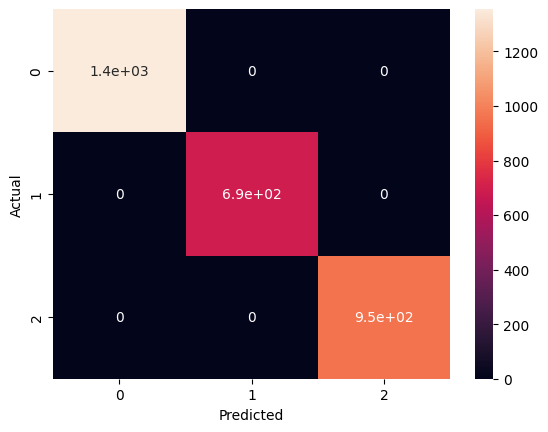

In [ ]:
#Decision Tree Confusion Matrix
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix=pd.crosstab(y_test, p3, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy is:', metrics.accuracy_score(y_test, p3))
print('Precision is:', metrics.precision_score(y_test, p3, average='macro'))
print('Recall is:', metrics.recall_score(y_test, p3, average='macro'))
print('F1-score is:', metrics.f1_score(y_test, p3, average='macro'))

ROC Curve of Decision Tree

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import plotly.graph_objects as go

# Binarize the output
y_bin = label_binarize(y_test, classes=y.unique())
y_pred_bin = label_binarize(p3, classes=y.unique())

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(y.unique())):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_pred_bin[:, i])

# Plot ROC curve
fig = go.Figure()

for i in range(len(y.unique())):
    fig.add_trace(go.Scatter(
        x=fpr[i],
        y=tpr[i],
        mode='lines',
        name=f'ROC curve of class {y.unique()[i]} (area = {roc_auc[i]:.2f})'
    ))

fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    showlegend=True
)

fig.show()

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbmodel=GaussianNB()
nbmodel.fit(X_train,y_train)
p4=nbmodel.predict(X_test)
p4

array([2, 2, 0, ..., 2, 0, 2])

Accuracy is: 0.997
Precision is: 0.9968357610670795
Recall is: 0.9973427443758937
F1-score is: 0.9970858455956547


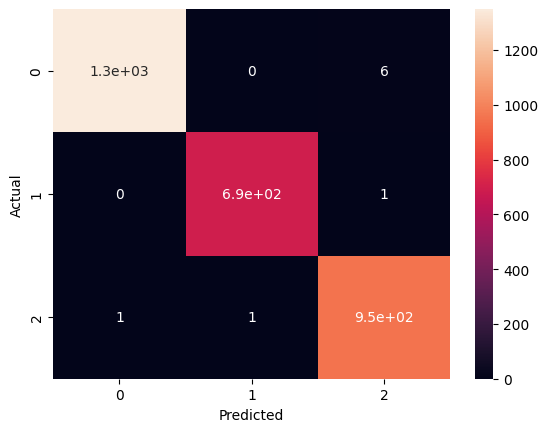

In [ ]:
#Naive Bayes Confusion Matrix
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix=pd.crosstab(y_test, p4, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy is:', metrics.accuracy_score(y_test, p4))
print('Precision is:', metrics.precision_score(y_test, p4, average='macro'))
print('Recall is:', metrics.recall_score(y_test, p4, average='macro'))
print('F1-score is:', metrics.f1_score(y_test, p4, average='macro'))

ROC of Naive Bayes

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import plotly.graph_objects as go

# Binarize the output
y_bin = label_binarize(y_test, classes=y.unique())
y_pred_bin = label_binarize(p4, classes=y.unique())

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(y.unique())):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_pred_bin[:, i])

# Plot ROC curve
fig = go.Figure()

for i in range(len(y.unique())):
    fig.add_trace(go.Scatter(
        x=fpr[i],
        y=tpr[i],
        mode='lines',
        name=f'ROC curve of class {y.unique()[i]} (area = {roc_auc[i]:.2f})'
    ))

fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    showlegend=True
)

fig.show()

In [ ]:
#kNN classifier
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=10)
knnmodel.fit(X_train,y_train)
p5=knnmodel.predict(X_test)
p5

array([0, 2, 0, ..., 2, 0, 0])

Accuracy is: 0.5723333333333334
Precision is: 0.5570547506836562
Recall is: 0.5114093774119237
F1-score is: 0.5137630405180825


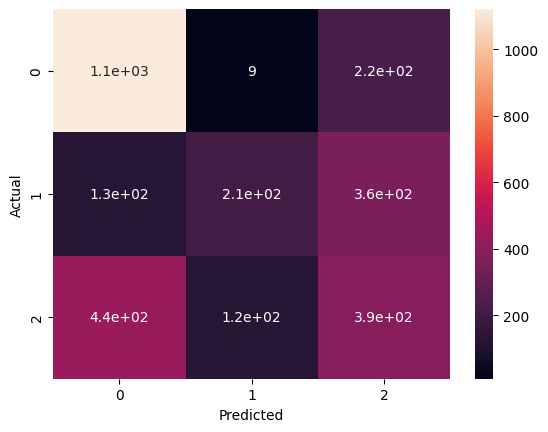

In [ ]:
#kNN Confusion Matrix
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix=pd.crosstab(y_test, p5, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy is:', metrics.accuracy_score(y_test, p5))
print('Precision is:', metrics.precision_score(y_test, p5, average='macro'))
print('Recall is:', metrics.recall_score(y_test, p5, average='macro'))
print('F1-score is:', metrics.f1_score(y_test, p5, average='macro'))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import plotly.graph_objects as go

# Binarize the output
y_bin = label_binarize(y_test, classes=y.unique())
y_pred_bin = label_binarize(p5, classes=y.unique())

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(y.unique())):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_pred_bin[:, i])

# Plot ROC curve
fig = go.Figure()

for i in range(len(y.unique())):
    fig.add_trace(go.Scatter(
        x=fpr[i],
        y=tpr[i],
        mode='lines',
        name=f'ROC curve of class {y.unique()[i]} (area = {roc_auc[i]:.2f})'
    ))

fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    showlegend=True
)

fig.show()

xgboost

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Fit label encoder on y_train and transform y_train
y_train = le.fit_transform(y_train)

model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=100,
    max_depth=6
)

# Train model
model.fit(X_train, y_train)

# Make predictions
# Transform y_test using the same label encoder
y_pred = model.predict(X_test)
y_pred = le.inverse_transform(y_pred)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[09:27:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




Accuracy: 1.00


Accuracy is: 0.9996666666666667


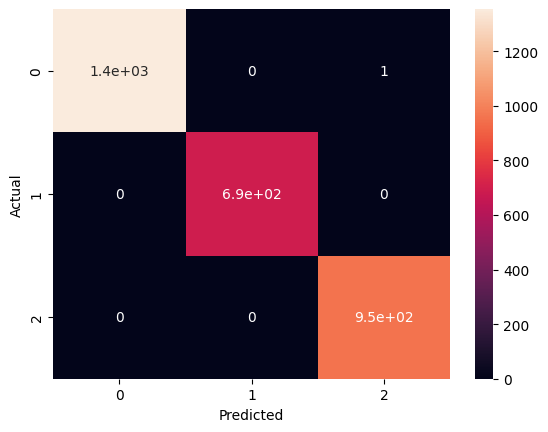

In [ ]:
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy is:', metrics.accuracy_score(y_test, y_pred))
# print('Precision is:', metrics.precision_score(y_test, y_pred, average='macro'))
# print('Recall is:', metrics.recall_score(y_test, y_pred, average='macro'))
# print('F1-score is:', metrics.f1_score(y_test, y_pred, average='macro'))

ROC Curve of xgboost

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import plotly.graph_objects as go

# Binarize the output
y_bin = label_binarize(y_test, classes=y.unique())
y_pred_bin = label_binarize(y_pred, classes=y.unique())

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(y.unique())):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_pred_bin[:, i])

# Plot ROC curve
fig = go.Figure()

for i in range(len(y.unique())):
    fig.add_trace(go.Scatter(
        x=fpr[i],
        y=tpr[i],
        mode='lines',
        name=f'ROC curve of class {y.unique()[i]} (area = {roc_auc[i]:.2f})'
    ))

fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    showlegend=True
)

fig.show()

Catboost

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
model = CatBoostClassifier(iterations=100,
                           learning_rate=0.5,
                           depth=6,
                           verbose=0)  # verbose=0 to turn off training log

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred1 = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


Accuracy is: 0.9996666666666667


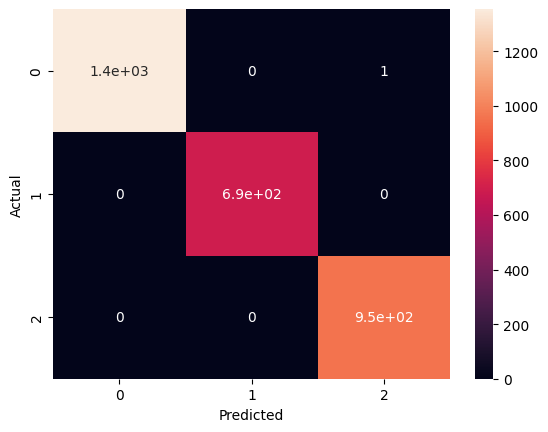

In [ ]:
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy is:', metrics.accuracy_score(y_test, y_pred))
# print('Precision is:', metrics.precision_score(y_test, y_pred, average='macro'))
# print('Recall is:', metrics.recall_score(y_test, y_pred, average='macro'))
# print('F1-score is:', metrics.f1_score(y_test, y_pred, average='macro'))

ROC curve for Catboost

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import plotly.graph_objects as go

# Binarize the output
y_bin = label_binarize(y_test, classes=y.unique())
y_pred_bin = label_binarize(y_pred1, classes=y.unique())

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(y.unique())):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_pred_bin[:, i])

# Plot ROC curve
fig = go.Figure()

for i in range(len(y.unique())):
    fig.add_trace(go.Scatter(
        x=fpr[i],
        y=tpr[i],
        mode='lines',
        name=f'ROC curve of class {y.unique()[i]} (area = {roc_auc[i]:.2f})'
    ))

fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    showlegend=True
)

fig.show()

Voting Classifer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Initialize individual models
log_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
tree_clf = DecisionTreeClassifier()
svc_clf = SVC(probability=True)  # Set probability=True for soft voting

# Initialize VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', tree_clf), ('svc', svc_clf)], voting='soft')

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy:.2f}')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Ensemble Model Accuracy: 0.99


Accuracy is: 0.9926666666666667


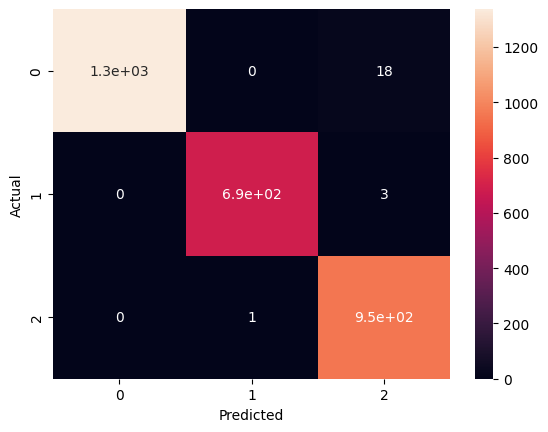

In [ ]:
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy is:', metrics.accuracy_score(y_test, y_pred))
# print('Precision is:', metrics.precision_score(y_test, y_pred, average='macro'))
# print('Recall is:', metrics.recall_score(y_test, y_pred, average='macro'))
# print('F1-score is:', metrics.f1_score(y_test, y_pred, average='macro'))

ROC curve of Voting Classifer

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import plotly.graph_objects as go

# Binarize the output
y_bin = label_binarize(y_test, classes=y.unique())
y_pred_bin = label_binarize(y_pred, classes=y.unique())

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(y.unique())):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_pred_bin[:, i])

# Plot ROC curve
fig = go.Figure()

for i in range(len(y.unique())):
    fig.add_trace(go.Scatter(
        x=fpr[i],
        y=tpr[i],
        mode='lines',
        name=f'ROC curve of class {y.unique()[i]} (area = {roc_auc[i]:.2f})'
    ))

fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    showlegend=True
)

fig.show()

10-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(log_clf, X, y, cv=10, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE and print each fold's score
mse_scores = -cv_scores
print(f"Cross-validation MSE scores for each fold: {mse_scores}")

# Print the mean and standard deviation of MSE
print(f"Mean MSE: {mse_scores.mean():.2f}")
print(f"Standard deviation of MSE: {mse_scores.std():.2f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.12/dist-packages/sklearn/

Cross-validation MSE scores for each fold: [0.088 0.074 0.07  0.069 0.087 0.088 0.07  0.072 0.096 0.079]
Mean MSE: 0.08
Standard deviation of MSE: 0.01


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**CONCLUSION**

Support Vector Machine(SVM) has the accuracy of 0.43785714285714283 that is 43.79%

K-Nearest Neighbour has the accuracy of 0.4432857142857143 that is 44.32%

Logistic Regression has the accuracy of 0.9721428571428572 that is 97.21%

Naive Bayes has the accuracy of 0.9921428571428571 that is 99.21%

Random Forest has the accuracy of 0.9995714285714286 that is 99.95%

Decision Tree has the accuracy of 0.9997142857142857 that is 99.71%

xgboost classifier has the accuracy of 1.00 that is 100%

Catboost Classifier has the accuracy of 1.00 that is 100%

Voting Classifier(Ensemble Model) has the accuracy of 0.9931428571428571 that is 99.31%


**10-Fold Cross Validation:**

MSE scores for each fold: [0.088 0.075 0.07  0.065 0.087 0.096 0.073 0.072 0.096 0.079]

Mean MSE: 0.08

Standard deviation of MSE: 0.01


In [ ]:
df

,Vehicle Type,Fuel Type,Engine Size,Age of Vehicle,Mileage,Speed,Acceleration,Road Type,Traffic Conditions,Temperature,Humidity,Wind Speed,Air Pressure,CO2 Emissions,NOx Emissions,PM2.5 Emissions,VOC Emissions,SO2 Emissions,Emission Level
0,2,1,2.747609,22,291288,49.083255,1.887738,1,2,13.880458,52.883905,18.938861,955.411642,179.930088,1.085520,0.011548,0.096207,0.022936,2
1,0,1,5.743714,3,188398,23.460311,3.544147,0,1,19.136947,5.697343,14.716526,1035.763062,250.505219,1.285628,0.187112,0.073321,0.028021,2
2,0,2,4.606368,17,281451,115.508350,4.646886,1,0,8.123428,3.953116,18.644522,976.207064,404.979103,0.258189,0.132398,0.014744,0.075334,0
3,3,1,3.913024,4,151321,18.540217,3.581004,2,1,35.994893,0.509678,11.951859,966.919462,463.568608,1.040956,0.166325,0.093490,0.025324,0
4,3,2,1.611297,15,91810,109.596566,3.879303,1,2,14.793481,52.450884,2.761138,953.229351,79.514604,1.583390,0.078043,0.020396,0.024986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,1,5.259811,1,67323,60.526870,1.665292,1,2,0.107381,28.128314,9.221882,1034.277856,380.616106,0.977784,0.162235,0.089424,0.054463,0
9996,0,0,5.467046,5,252851,114.120190,1.174369,0,0,37.641697,20.696240,8.927107,958.678711,135.691599,0.338428,0.076185,0.077451,0.099687,1
9997,0,3,5.722881,8,44810,11.987215,0.598791,1,0,35.140403,86.267431,15.105582,1020.702178,315.706170,1.265111,0.082554,0.052279,0.088755,0
9998,0,2,2.866938,2,58719,95.832661,1.475712,2,1,-6.692706,64.800649,10.002372,1037.489415,210.794670,0.180733,0.062148,0.077239,0.055793,2
